In [3]:
from main import *

Datei öffnen:

In [8]:
audio_arr, sr = openFile(r"C:\Users\Domin\Desktop\WAVTactilTransformer\viblib\v-09-10-12-2.wav")

File C:\Users\Domin\Desktop\WAVTactilTransformer\viblib\v-09-10-12-2.wav exists.


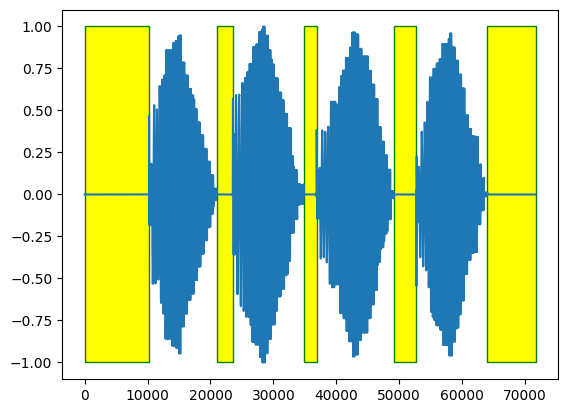

In [9]:
breaks_list = findBreaks(audio_arr=audio_arr) #findet Pausen in Audio Array

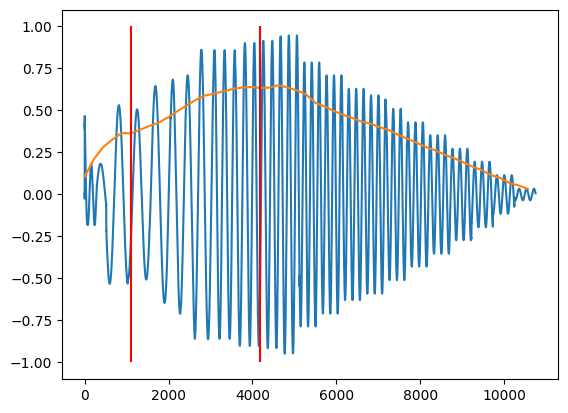

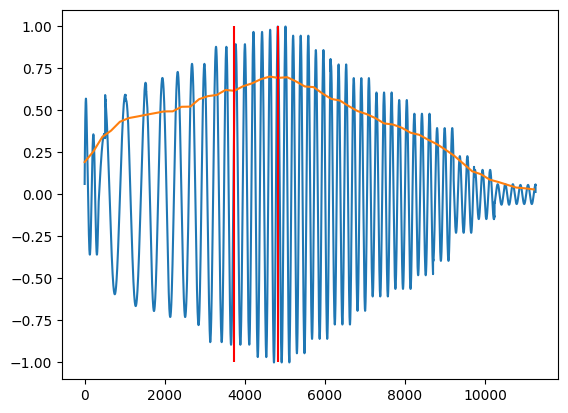

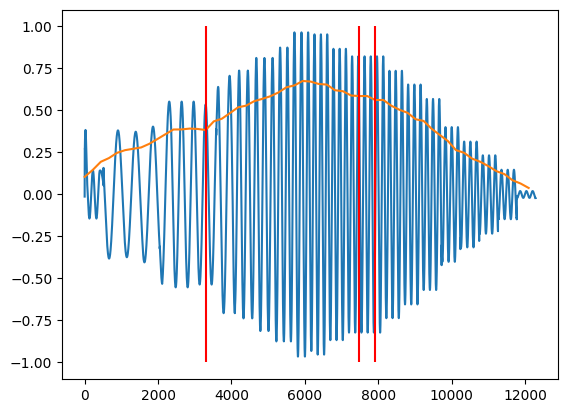

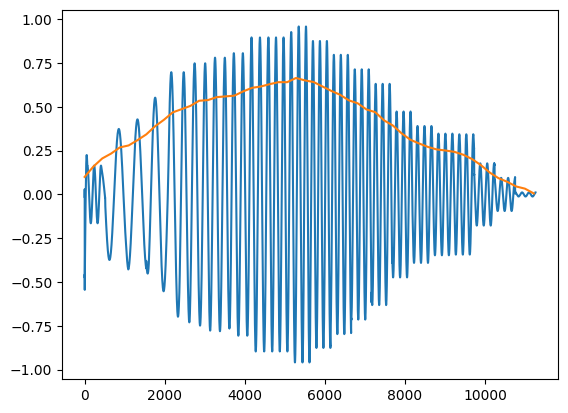

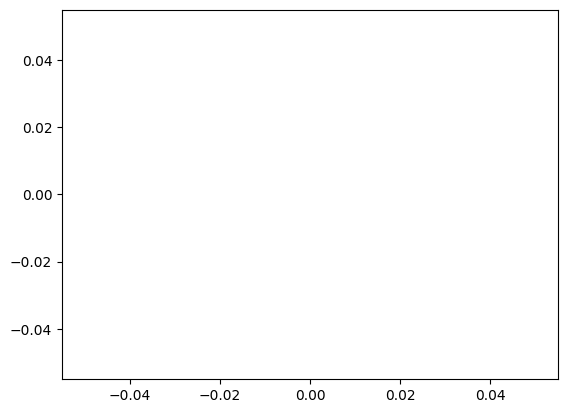

In [10]:
audio_arr_list = splitAudioArrAtBreaks(audio_arr=audio_arr, breaksList=breaks_list)
for audio in audio_arr_list:
  findBlocksbyAmplitude(audio,sr=sr)